# Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
import diagnosis
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

## Table of Contents

* [Introduction](#Introduction)
* [Data Description](#Data-Description)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Data Preparation](#Data-Preparation)
    * [Data Visualization](#Data-Visualization)
* [Model Construction](#Model-Construction)
    * [Logistic Regression](#Logistic-Regression)
    * [Decision Tree](#Decision-Tree)
    * [Random Forest](#Random-Forest)
* [Model Selection and Final Model Evaluation](#Model-Selection-and-Final-Model-Evaluation)
* [Hypothesis testing](#Hypothesis-testing)
* [Discussion & Conclusion](#Discussion-&-Conclusion)
* [Author Contributions](#Author-Contributions)

## Introduction

For our project, we as a group wanted to focus on the health industry. We wanted to find a dataset where we could apply predictions to give a diagnosis to the patient. As we were browsing for datasets, we had to decide which disease we wanted to study. We decided to look at cancer, as cancer is a widely studied disease today. This motivated us to analyze the breast cancer dataset publicly available on Kaggle. We believe that our analysis of this dataset would be helpful to doctors and patients, who want to find out whether the cancer is benign or malignant. 

For our model, we decided to choose to use a classification model as our goal is to classify whether the cancer is benign or malignant. To do this, we ran different models including logistic regression, decision trees and random forests on the training set and then, based on the performance on the vailidation set, we picked the best one. After that, we evaluated our final model on the testing set. Furthermore, we performed hypothesis testing using the parametric Two-Sample T-Test and the non-parametric Wilcoxian Rank Sumt Test to see whether our results are statistically significant at a significance level of 5%. We would like the results of our hypothesis testing to serve as initial indicators of potentical cancer diagnosis for the doctors. Based on our final model, we hope that our model can serve as a strong basis for predicting whether the cancer is benign or malignant based on its characteristics. 

## Data Description

The raw data is from Kaggle, which can be found [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). The data was given to us in a csv file with 569 observations, so it was hard to interpret. To better interpret the data, we converted the data into a pandas dataframe. Each row of the data represents a specific patient. 357 patients have benign cancer and 212 have malignant cancer. The dataset contains 32 columns with 30 features representing the tumor's characteristics. We treated the `diagnosis` column as our response variable. All of the features are quantitative (`float64`) except for the id column (`int64`) and the diagnosis (`str` - `'M'` or `'B'`).  

For each patient, a digitized image depicting the fine needle aspirate (FNA) of a breast mass is taken. Ten real-valued features are then computed for each cell nuclei present in the image. To summarize the findings for each patient, the table below contains the mean, the standard error, and the "worst" (mean of the three largest values) for each of the ten features, generating a total of thirty features for each patient.

Below is the raw dataset that we have from Kaggle:

In [2]:
raw_data = pd.read_csv('data/raw_data.csv')
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploratory Data Analysis

Before diving into statistical modelling and analysis, we first generally explored our data to obtain a quick but comprehensive understanding of it. By doing so, we can not only fix problems in our data, such as missing values and duplicated observations, but also be more directed when we build any statistical model and conduct any statistical testing on our data.

### Data Preparation

We first noticed that the last column was empty in the data, so we needed to drop it from our data. Then, we checked if there was any missing value or duplicated observation in our data. If so, we decided to drop the rows or observations that have missing values or is duplicated. Fortunately, we did not find any missing value or duplicated observation. Then, we checked if all feature columns have the desired data type. Finally, because our chosen classification models only accept numerical response variable, which is `diagnosis` in our data, we have to one-hot encode `diagnosis` to convert it to `1`s and `0`s, which would allow us to run our classification model. The diagnosis is read as follows: 0 for benign and 1 for malignant.

After cleaning the data, we splitted the data into training, validation, and testing sets, which is a common principle in building statistical models. We will use the training set to fit different models, use the validation set to compare and select the final one from our models, and then use testing set to evaluate the final performance of our model. 

Here we load the training, validation, and testing set splitted from the cleaned data.

In [3]:
train, val, test = diagnosis.load_data('data/raw_data.csv', val_size=0.2, test_size=0.15, random_state=159)
print(train.shape, val.shape, test.shape)

(386, 32) (97, 32) (86, 32)


More details can be found in `codes/data_prepare.ipynb`.

### Data Visualization

In [4]:
clean_data = diagnosis.clean_data(raw_data, enc_columns=['diagnosis'])

After having the clean data, we conducted data visualization on the clean data to understand our data. Note that we visualized the entire data before splitting.

#### General

We first checked what exact features we have in the data

In [5]:
clean_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Besides the feature `id` and the response variable `diagnosis`, there are 30 features in total, which can be splited into three groups - mean (`mean`), standard error (`se`), and "worst" or largest (`worst`). In each group, we have `radius`, `texture`, `perimeter`, `area`, `smoothness`, `compactness`, `concavity`, `concave points`, `symmetry`, and `fractal dimension`.

Since the three groups of features describe similar things, we inspected the collinearity between each pair of features by computing the correlation matrix of all the features.

In [6]:
clean_data = clean_data.drop(["id"], axis=1)
clean_data.drop(["diagnosis"], axis=1).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


This is a giant table since we computed pairwise correlations between 30 features, but we could clearly see some pairs of features have relatively high correlation, such as `radius_mean` vs `radius_worst` and `perimeter_mean` vs `radius_mean`. This warned us that there could be variability and numerical stability issues for later computation and statistical analysis, and we should be aware of that.

Then, we printed out some statistics of each column or feature.

In [7]:
clean_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We could see that the column `diagnosis` has the mean $0.3726$. Since we used `0` and `1` to represent `belign` and `malignant` cancer, the mean implied that around $37.26\%$ of the cancers in our data are `malignant`. 

Since the features are numerical, we could also observe their distritbuions. By the central limit theorem in statistics, some of our features should have a approximately normal distribution.

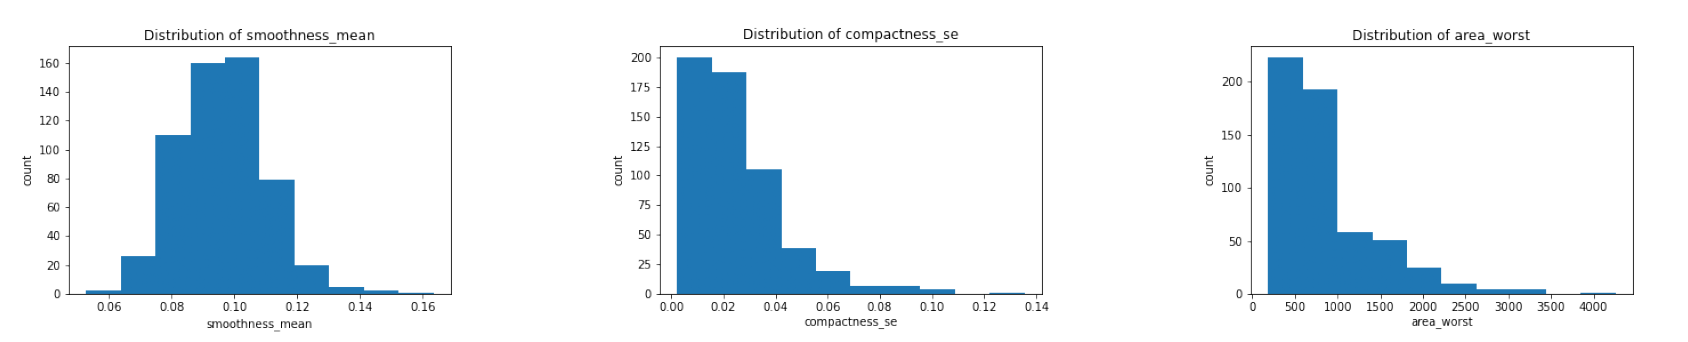

In [8]:
file_list_lg = ['figures/smoothness_mean_distr.png', 'figures/compactness_se_distr.png', 'figures/area_worst_distr.png']
diagnosis.plot_three_figs_horizontally(file_list_lg)

The three figures above are some examples. After plotting the distributions of all the features, we found that the majority of the `mean` features are roughly symmetric or normal whereas the majority of the `se` and `worst` features are relatively right-skewed. 

#### Belign vs Malignant

Since we were interested in studying the difference between belign and malignant cancers, it might be helpful to analyze and compute the statistics of two populations separately and then compare.

In [9]:
belign = clean_data[clean_data['diagnosis'] == 0]
malignant = clean_data[clean_data['diagnosis'] == 1]

We first compared the means of each feature in two populations.

In [10]:
clean_data.groupby('diagnosis').mean().transpose()

diagnosis,0.0,1.0
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


Obviously, most of the features have different averages in two populations, but it is hard to tell whether such differences are significant or not. To assess this, we could compare the distributions of features in each population. 

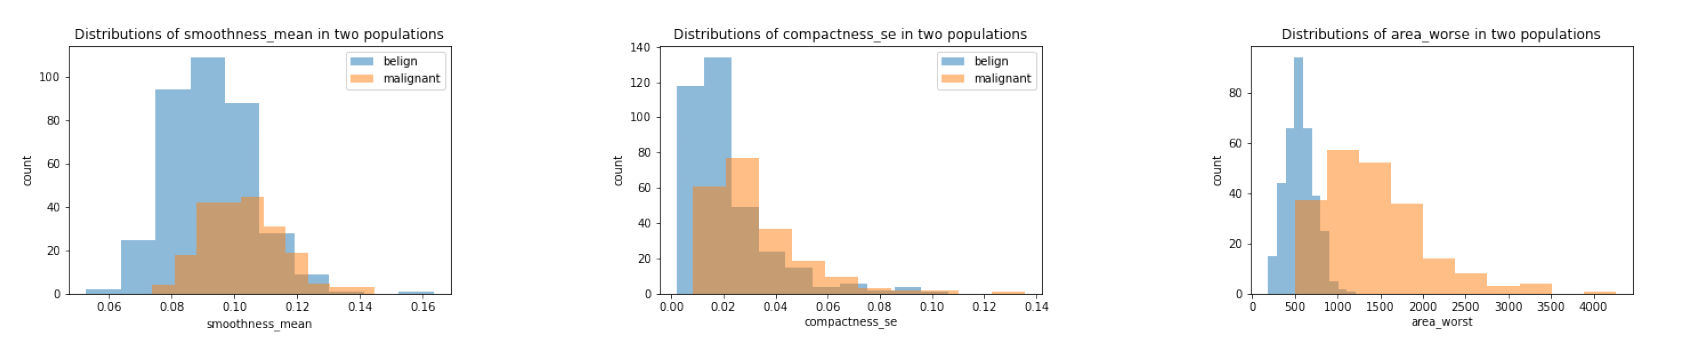

In [11]:
file_list_lg = ['figures/smoothness_mean_distr_two_popu.png', 'figures/compactness_se_distr_two_popu.png', 'figures/area_worst_distr_two_popu.png']
diagnosis.plot_three_figs_horizontally(file_list_lg)

We chose the same three features we plotted before. We saw that although `belign` and `malignant` had different distributions in all the plots, it was still hard to judge whether it was due to the randomness since two populations have different size (as showed clearly in `smoothness_mean` feature). Thus, we should conduct some more rigorous statistical hypothesis testing, such as two-sample t-test, to judge this. And this would be shown in a later section.

More details can be found in `codes/data_visual.ipynb`.

## Model Construction

In our research, we wish to build a model that can identify whether the cancer is benign or malignant. To build a model with the best predictive power, we tried both parametric and nonparametric models, including Logistic Regression, Decision Tree, and Random Forest. After fitting each model on the training set, we compare their performance on the validation set, and select the best one. Then, we refit the best model on the combination of the training and validation set, and evaluate its performance on the testing set.

We used the following metrics to measure models' performance:

- Accuracy: The accuray of a model is the fraction of correct predictions: $\frac{\text{correct predictions}}{\text{total number of data points}}$

- Confusion Matrix: A confusion matrix is a table that is used to visualize the performance of a classification algorithm, with four elements: True Positive, True Negative, False Positve (Type I Error), False Negative (Type II Error).

- ROC Curve: ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). When we read ROC curves, we compare the AUC ROC curves. AUC stands for the area under an ROC curve, and it is a measure of the accuracy of a diagnostic test. AUC is the average true positive rate (average sensitivity) across all possible false positive rates. In general, higher AUC values indicate better test performance.

- Precision Recall Curve: The precision-recall curve is a graph with Precision values ($\frac{TP}{TP+FN}$) on the y-axis and Recall values ($\frac{TP}{TP+FP}$) on the x-axis. It shows the tradeoff between precision and recall for different threshold.

- F1 score: F1 score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

### Logistic Regression 

In this section, we will perform logistic regression analysis.

Description: Logistic Regression works by calculating posterior probabilies for the data by using the logistic function and based on those probablities it classifies the data point.Given below is the logistic function:

$$ s(x) = \frac{1}{1+ e^{-x}} $$

Limitations and Assumptions: An important thing to note about logistic regression is that it can only be used for binary classifiation and not multiclass classification. This is because it follows the rule that any point whose probability of being in a class is more than 50% is assigned to that class. If not, it is assigned to the other class. 

Preprocessing: For the preprocessing, we dropped the diagnosis column (since we don't want to see the labels) and the id column (since it is not a very predictive feature) to create our feature matrix. Then we evaluated the model using various metrics. The calculated metrics and the preprocessing can be found in the logistic_reg.ipynb. Here are the plots:

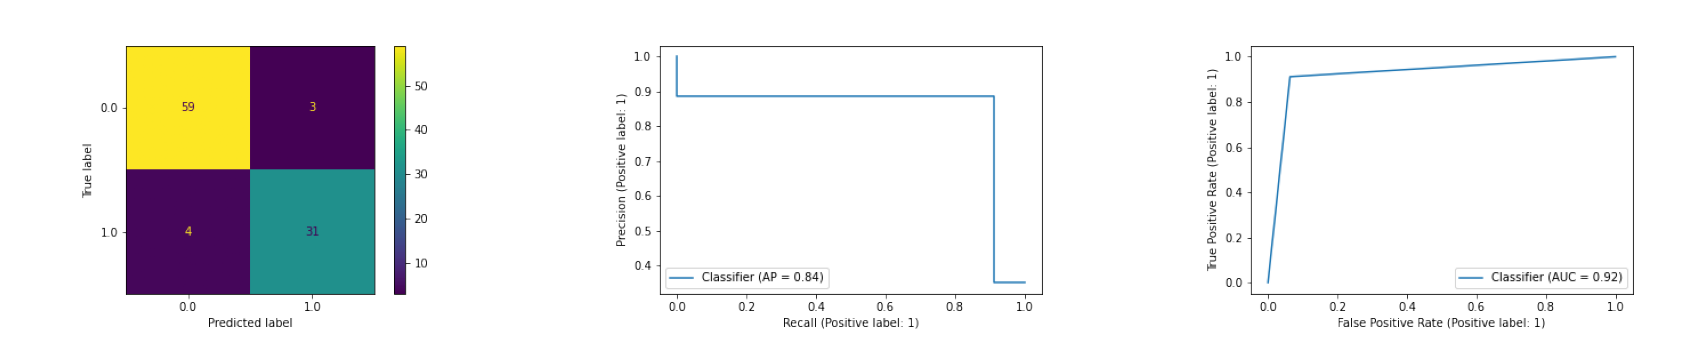

In [12]:
file_list_lg = ['figures/confusion_matrix_logistic.png', 'figures/precision_recall_curve_logistic.png', 'figures/roc_curve_logistic.png']
diagnosis.plot_three_figs_horizontally(file_list_lg)

Evaluation: The classifier seems to performing well with a very few false positive (falsely classifying cancer as malignant) and false negatives (falsely classfying the cancer as benign). In addition, the AUC of the classifier is 0.92, which means that the classifier is getting the correct answer 92% of the time.

### Decision Tree

The Decision tree algorithm is a supervised learning algorithm that continuously splits data points to form predictions. Every decision tree includes a root node, branches, and leaf nodes. The internal leaf nodes are decision points that describe various test cases whereas the branches represent the outcomes of those decisions. The very bottom nodes in a decision tree give prediction values to the data. A decision tree is an appropriate model for this data as it can be used to solve classification problems such as this one where we are trying to identify whether the cancer is benign or malignant.

The accuracy of the Decision Tree model is about 0.9381, and its F1 score is about 0.9143. The  confusion matrix, ROC curve, and Precision Recall Curve are below.

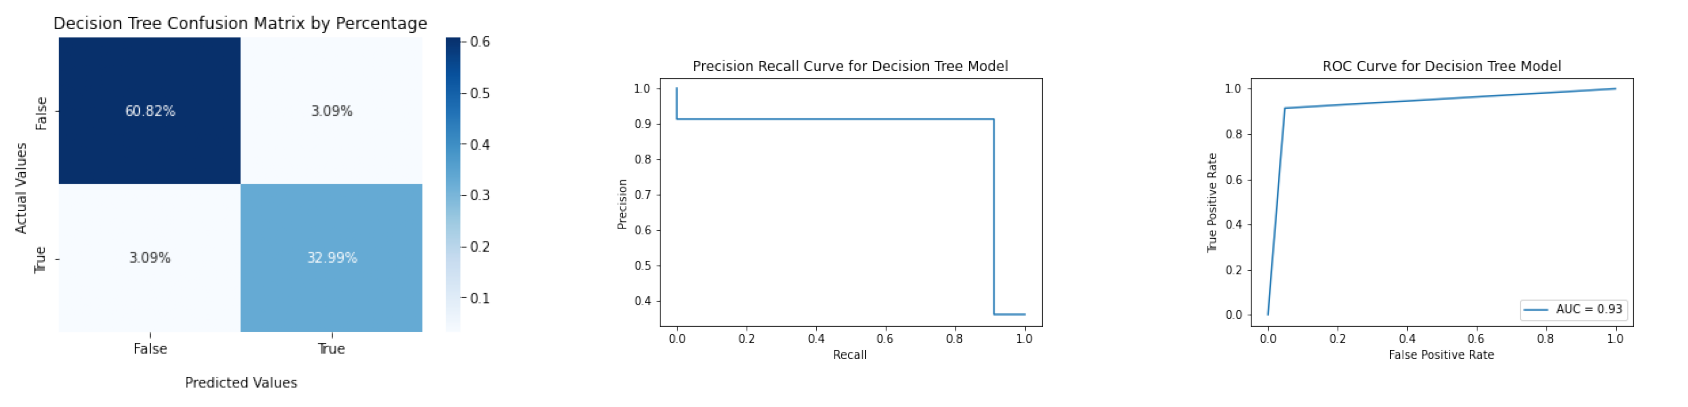

In [13]:
file_list_dt = ['figures/confusion_matrix_dt.png', 'figures/precision_recall_curve_dt.png', 'figures/roc_curve_dt.png']
diagnosis.plot_three_figs_horizontally(file_list_dt)

### Random Forest

The Random Forest algorithm builds on the decision tree algorithm by creating multiple decision trees. Each tree is then trained on a randomly drawn sample from the data. Each tree constructed does not consider every feature as a potential split point. The algorithm then averages the predictions across all the decision trees. Random Forest is an appropriate model for this data because like a decision tree, it can be used for classification problems. Furthermore, it can be a better fit than a single decision tree because random sampling and averaging across models help overcome overfitting and allows for more generalization.

The accuracy of the Random Forest model is about 0.9588, and its F1 score is about 0.9412. The  confusion matrix, ROC curve, and Precision Recall Curve are below.

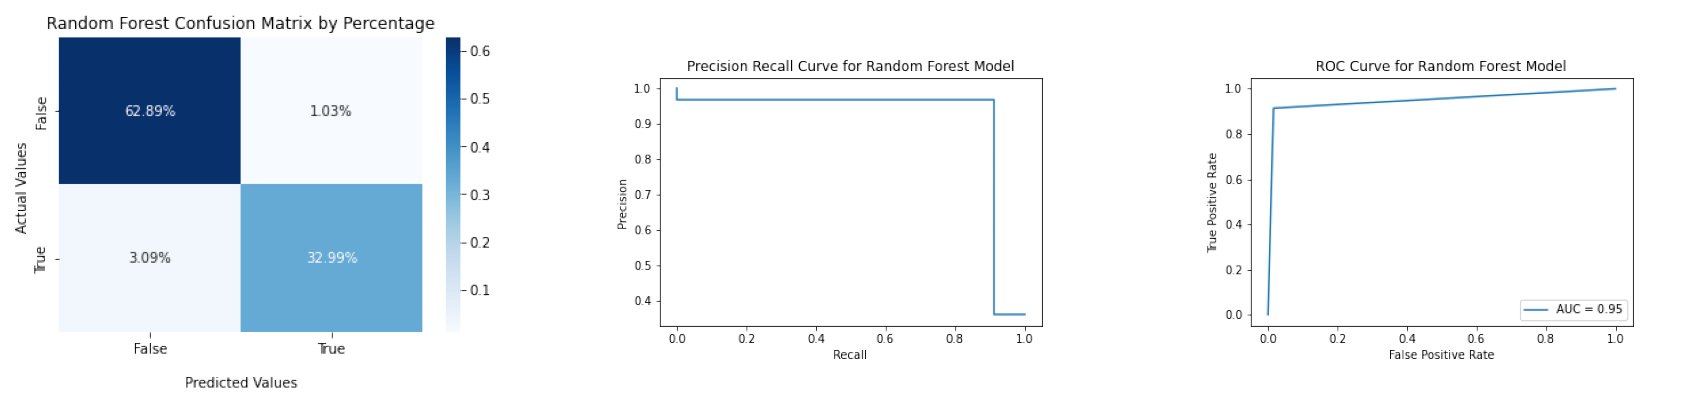

In [14]:
file_list_rf = ['figures/confusion_matrix_rf.png', 'figures/precision_recall_curve_rf.png', 'figures/roc_curve_rf.png']
diagnosis.plot_three_figs_horizontally(file_list_rf)

## Model Selection and Final Model Evaluation

In [15]:
df_metrics = pd.read_pickle('tables/metrics_df.pkl')
df_metrics

,Model,Accuracy,FPR,FNR,TPR,TNR,AUC,F1 Score
0,Logistic Regression,0.9278,0.0309,0.0412,0.3196,0.6082,0.92,0.8986
1,Decision Tree,0.9381,0.0309,0.0309,0.3299,0.6082,0.93,0.9143
2,Random Forest,0.9588,0.0103,0.0309,0.3299,0.6289,0.95,0.9412


Random Forest Model performs better than Logistic Regression and Decision Tree in validation set since it gets higher accuracy, higher TPR and TNR as well as lower FPR and FNR, higher AUC, and higher F1 Score. Therefore, we select Random Forest Model as our final model and use the test set to evaluate its performance. The performance of our final model is plotted below.

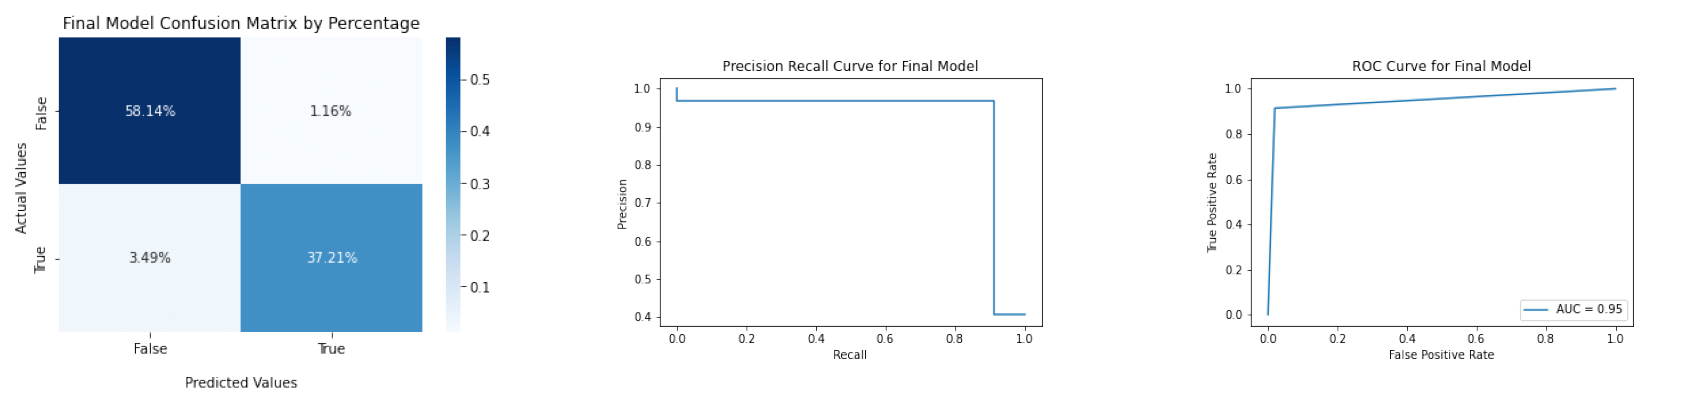

In [16]:
file_list_final = ['figures/confusion_matrix_final.png', 'figures/precision_recall_curve_final.png', 'figures/roc_curve_final.png']
diagnosis.plot_three_figs_horizontally(file_list_final)

The accuracy of final model is 0.9535, and the F1 score is 0.9412. Overall, we are able to build a prediction model that has high accuracy and balances precision and recall. One notable thing of our model is that it has a relatively higher False Negative Rate than False Positive Rate, which means it is more likely to identifiy a patient who actually has benign breast cancer as having malignant breast cancer. In future studies, we might focus on how to lower the FNR when building the predictive model.  

## Hypothesis testing

While classification helps to distinguish malignant breast cancer patients from benign cancer patients, we next want to see whether some features differ in the two populations which may not be attributed to just chance due to the sample observed. More specifically,  using parametric and non-parametric hypothesis testing, we will identify features that have a significantly different average value in the two populations, which doctors may then utilize as initial indicators of malignant vs. benign cancer prior to actual diagnosis. Rather than immediately identifying patiients with either malignant or benign cancer, which may require health senstive and cost intensive procedures, doctors may use the results of the hypothesis testing to better guide the patients in the early stages of their treatments. Additionally, if all of the required input features are not present to use the models we developed above, doctors may utilize the results of hypothesis testing.   

We identified that the 'area worst' feature, which is the mean of the three highest values of the area feature for each patient, had the largest average difference between the two populations and a large difference in their sample variances as well. On the otherhand, the 'texture se', which is the standard error of the texture feature, had the smallest average difference between the two populations as well as close sample variances. While we decided to perform hypothesis testing on two features to avoid multiple testing issue, you may choose to perform hypothesis testing on other features using the readily available methods designed for this by importing the diagnosis package. We specifically utilized the Two Sample T Test, parametric, and the Wilcoxon Rank Sum Test, non-parametric, to conduct the hypothesis testings, as the assumption of normality for the two samples may not be assumed with high confidence.

For each of the two features identified, we performed the following hypothesis test (parametric Two Sample T Test and the non-parametric Wilcoxian Rank Sum Test).
$$H_0: \mu_0 = \mu_1$$

$$H_1: \mu_0 \neq \mu_1$$

In the table below, we see that the 'area worst' feature has a statistically highly significant p value for both the parametric and the non-parametric test, which is less than 1%. Hence, we reject the null hypothesis that the two populations have the same mean value for the 'area worst' feature. On the otherhand, for the 'texture se' feature, we see that the p value is above 5% for both the parametric and the non-parametric test, hence we fail to reject the null hypothesis that the two populations have the same mean value for the 'texture se' feature. The doctors may choose to utilize thee 'area worst' faeture as an early pontential indicator for malignant vs. benign cancer.  

In [17]:
ht_results = pd.read_pickle("tables/ht_results.pkl")
ht_results

,T Statistic,P Value
area worst parametric,-20.570814,4.937924e-54
area worst non-parametric,-18.754029,1.794645e-78
texture se parametric,0.197724,8.433320e-01
texture se non-parametric,-0.462805,6.435040e-01


## Discussion & Conclusion

In our reseach, we successfully built classification models to identify patients with malignant breast cancer using Decision Tree, Random Forest Algorithm, and Logistic Regression. Our final model is a Random Forest Algorithm which has a high accuracy 95.88%. This means that our final model corrrectly identifies patients with their correct diagnosis with high accuracy. We additionaly focused on finding the best balance between the precision and recall metrics. However, one limitation of our model is that it has a relatively high False Negative Rate of 0.0349 compared to the False Positive Rate of 0.0116, which means that our model fails to identify patients with malignant cancer effectively more often that we would like. This could cause the patient with malignant breast cancer to delay their treatment time. Therefore, a direction for future model improvement could be to decrease the False Negative Rate. In addition, a feature selection process might improve our model by solving the overfitting issue, which can be applied in future studies. We also conducted the parametric Two Sample T Test and the non-parametric Wilxocon Rank Sum Test on selected features available in the dataset to see which features were statistically significant among the malignant diagnosed patients vs. the benign diagnosed patients; this can help guide the doctors in the early stages of the treatment when many of the features may not yet be collected. This project is a great starting point for future projects, with the addition of a bigger sample size, more features, and a variety of models.

## Author Contributions

Note that this section has the same content in `contribution statement.md`.

Jiaji Wu: Created `decision_tree_and_random_forest.ipynb` and `final_model_selection.ipynb` to construct the decision tree and random forest and select the final model; contributed on the Prediction Model Construction section in `main.ipynb`; added helper functions in modelmake.py and corresponding testing functions. 

Kshitij Chauhan (TJ): Created the `logistic_reg.ipynb notebook` to conduct logistic regression analysis and tests in test_logistic_reg.py file to test the functions. Also did the introduction, data description and logistic regression sections of this `main.ipynb` notebook.

Neha Haq: Created the `two_populations_analysis.ipynb notebook` to conduct the parametric Two Sample T Tests and the non-parametric Wilcoxon Rank Sum Test. Set up the diagnosis python package. Wrote the methods in `twosample.py` and the tests in the `test_twosample.py`. Created the Jupyter Book and the Github actions. Wrote the hypothesis tests section of the `main.ipynb`. Wrote the root `README.md`.

Wenhao Pan: Created `data_prepare.ipynb` and `data_visual.ipynb` notebooks and corresponding helper functions and testing functions in our local package `diagnosis`; created environment configuration files (`Makefile`, `environment.yml`, `requirements.txt`, and `*.sh`); designed the repository structure; responsible for most pull requests; coordinate the group meetings